In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Lab 2

## Problem 1

### A, B

Text(0, 0.5, 'Probability')

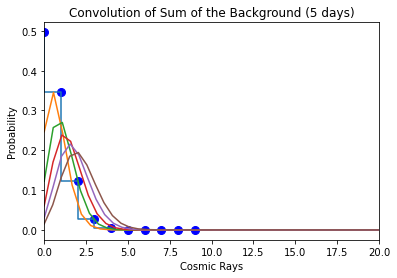

In [19]:
X = 0.7
Y = 4.5
y = np.arange(0, 10)
a = 0
b = 10
fig, ax = plt.subplots()
ax.plot(y, stats.poisson.pmf(y, 0.7), 'bo', ms = 8, label = 'poisson pmf')
ax.step(y, stats.poisson.pmf(y, X))
convolution = np.convolve(stats.poisson.pmf(y, X), stats.poisson.pmf(y, X))
ax.plot(np.linspace(0, b, len(convolution)), convolution)
while a < 4:
    b = b * 2
    convolution = np.convolve(convolution, stats.poisson.pmf(np.arange(0, b), X))
    ax.plot(np.linspace(0, b, len(convolution)), convolution)
    a = a + 1
plt.xlim(0, 20)
plt.title('Convolution of Sum of the Background (5 days)')
plt.xlabel('Cosmic Rays')
plt.ylabel('Probability')

The graph above shows that the probability of the mean decreases as I integrate for more days but the mean shifts. Also, from the graph, after 5 days, the shape is still the same compared to day 0, meaning it is still a poisson distribution

Text(0, 0.5, 'Probability')

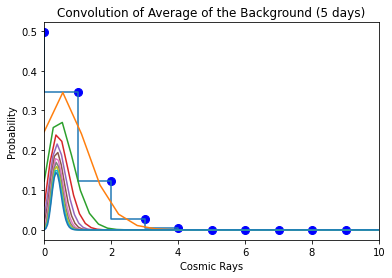

In [25]:
X = 0.7
Y = 4
y = np.arange(0, 10)
a = 1
b = 10
fig, ax = plt.subplots()
ax.plot(y, stats.poisson.pmf(y, 0.7), 'bo', ms = 8, label = 'poisson pmf')
ax.step(y, stats.poisson.pmf(y, X))
convolution = np.convolve(stats.poisson.pmf(y, X), stats.poisson.pmf(y, X))
ax.plot(np.linspace(0, b, len(convolution)), convolution)
while a < 10:
    b = b * 2
    convolution = np.convolve(convolution, stats.poisson.pmf(np.arange(0, b), X))
    ax.plot(np.linspace(0, b, len(convolution)) / (a+1), convolution)
    a = a + 1
plt.xlim(0, 10)
plt.title('Convolution of Average of the Background (5 days)')
plt.xlabel('Cosmic Rays')
plt.ylabel('Probability')

From the graph, I can see that the average makes the distribution shrinks. Also, it also matches the central limit theorem that it is getting more like a gaussian distribution.

### D

In [22]:
N = 15
probability = 1 - stats.poisson.cdf(N*Y, 20)
print('probability')
print(probability)
print()
sigma = stats.norm.ppf(1 - probability)
print('sigma')
print(sigma)

probability
1.3777867735598193e-13

sigma
7.305831481440323


The probability is 7.31 sigma assuming 20 gamma rays is being observed.

## Problem 2

### A, B

(1e-50, 2.1116994508408075e+59)

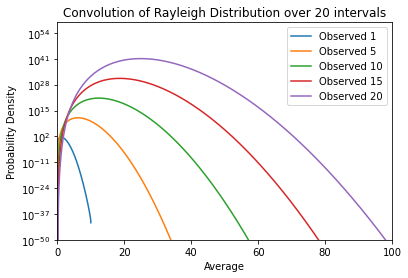

In [32]:
x = np.linspace(0,10,1000)
array = [1, 5 ,10, 15, 20]
fig, ax = plt.subplots()
for z in range (5):
    d = stats.rayleigh()
    convolution = np.convolve(d.pdf(x), d.pdf(x))
    if array[z] is not array[0]:
        for i in range(array[z]):
            convolution = np.convolve(d.pdf(x), convolution)
    ax.plot(np.linspace(0, 10*array[z], len(convolution)), convolution)
    plt.legend(["Observed 1", "Observed 5", "Observed 10", "Observed 15", "Observed 20"])
plt.xlim(0, 100)
plt.title("Convolution of Rayleigh Distribution over 20 intervals")
plt.xlabel("Average")
plt.ylabel("Probability Density")
plt.yscale('log')
plt.ylim(1e-50, None)

As the graph shows, the distribution gets taller as the interval increases but they are still Rayleigh shaped, but it isn't really Gaussian yet.

Text(0, 0.5, 'Probability Density')

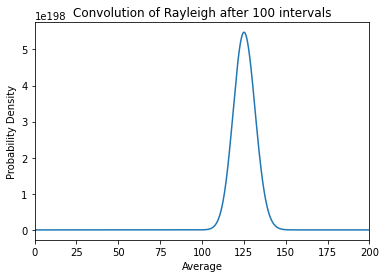

In [37]:
x = np.linspace(0,10,1000)
n = 100
fig, ax = plt.subplots()
d = stats.rayleigh()
convolution = d.pdf(x)
for i in range(n):
    convolution = np.convolve(d.pdf(x), convolution)
ax.plot(np.linspace(0, 10*n, len(convolution)), convolution)
plt.xlim(0,200)
plt.title("Convolution of Rayleigh after 100 intervals")
plt.xlabel("Average")
plt.ylabel("Probability Density")

After 100 intervals, it surely looks more Gaussian now.

## Problem 3

### Version 1

From looking at all the other pixels in your image, I measure the width of the background Gaussian distribution (X = 5). I see a signal of strength 30.6. 

In [6]:
d = stats.norm(scale = 5)
probability = d.sf(30.6)
print(probability)
sigma = stats.norm.ppf(1 - probability)
print(sigma)

4.678767874181615e-10
6.120000017050689


I get 6.12 sigma, which is greater than 5 sigma. Therefore, I can reject the null hypothesis and claim the discovery.

### Version 2

#### B

What is the probability that the total background data of 10k pixels produced a signal that is equally or more signal-like than 30.6?

In [7]:
probability = d.sf(30.6) * 10000
print(probability)

4.678767874181615e-06


#### C

In [8]:
sigma = stats.norm.ppf(1 - probability)
print(sigma)

4.4315102649727764


I get 4.43 sigma which is less than 5 sigma so I can't reject the null hypothesis.

## Problem 4

### A

In [10]:
probability = stats.norm.sf(5)
signal = d.ppf(1 - probability)
print(signal)

24.99999999985088


It requires the signal to be 25.

### B

In [11]:
big_signal = d.ppf(1 - (probability / 10000))
print(big_signal)

32.752687434458274


It requires the signal to be 32.8.

### C

In [12]:
print(big_signal / signal)

1.3101074973861455


The signal must be 31% brighter for it to be a discovery. The sensitivity penalty is so low here because the probability of seeing the brighter signal decreases hugely.

### D

In [15]:
enormous_signal = d.ppf(1 - (probability / 10e8))
print(enormous_signal)
print(enormous_signal / signal)

40.38285502065062
1.6153142008356598


Using 10,000,000 trials, the signal must be 61.5% brighter to make it a discovery. The signal doesn't change that much since the probability of getting such signal decreases rapidly as the signal is further away from the mean.

## Extra Credit

I am using Rayleigh distribution as non-Gaussian distribution

In [17]:
d = stats.rayleigh(scale = 5)
signal = d.ppf(1 -probability)
print(signal)
big_signal = d.ppf(1 - (probability / 10000))
print(big_signal)
print(big_signal / signal)

27.44539888017119
34.839157512357254
1.2693988403836944


Under 10,000 trials, the signal increases 27% compared to 31% which is smaller. Therefore, the sensitivity penalty of Rayleigh distribution is smaller in this case.